# Predicting Home Entertainment Movie Consumption

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import linear_model

In [2]:
# loads in csv
dtt = pd.read_csv("Data\DTT Final Data w labels.csv",index_col=0)
dtt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1925 entries, 2 to 19560
Data columns (total 30 columns):
Gender                   1925 non-null object
Age                      1925 non-null int64
Region                   1925 non-null object
Region2                  1925 non-null object
Race                     1925 non-null object
Language_Dominance       1925 non-null object
Parent                   1925 non-null object
HH_Income                1925 non-null object
Employment               1925 non-null object
Education                1925 non-null object
Marital_Status           1925 non-null object
Total_Paid_HE_Movies     1925 non-null int64
Bought_Disc_DVD          1925 non-null int64
Bought_Disc_BD           1925 non-null int64
Bought_Digital           1925 non-null int64
Rented_Disc_Store        1925 non-null int64
Rented_Disc_Kiosk        1925 non-null int64
Rented_Disc_Mail         1925 non-null int64
Rented_Digital_iVOD      1925 non-null int64
Rented_Digital_sVOD      19

In [3]:
#Calculates all rollups and adds as columns

#total movies bought on disc
dtt['Total Discs Bought'] = (dtt['Bought_Disc_BD'] + dtt['Bought_Disc_DVD'])

#total movies rented on disc
dtt['Total Discs Rented'] = (dtt['Rented_Disc_Kiosk'] + dtt['Rented_Disc_Mail'] + dtt['Rented_Disc_Store'])

#total movies rented on digital
dtt['Total Digital Rented'] = (dtt['Rented_Digital_cVOD'] + dtt['Rented_Digital_iVOD'] + dtt['Rented_Digital_sVOD'])

#total movies purchased
dtt['Total Bought'] = (dtt['Bought_Disc_BD'] + dtt['Bought_Disc_DVD'] + dtt['Bought_Digital'])

In [4]:
dtt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1925 entries, 2 to 19560
Data columns (total 34 columns):
Gender                   1925 non-null object
Age                      1925 non-null int64
Region                   1925 non-null object
Region2                  1925 non-null object
Race                     1925 non-null object
Language_Dominance       1925 non-null object
Parent                   1925 non-null object
HH_Income                1925 non-null object
Employment               1925 non-null object
Education                1925 non-null object
Marital_Status           1925 non-null object
Total_Paid_HE_Movies     1925 non-null int64
Bought_Disc_DVD          1925 non-null int64
Bought_Disc_BD           1925 non-null int64
Bought_Digital           1925 non-null int64
Rented_Disc_Store        1925 non-null int64
Rented_Disc_Kiosk        1925 non-null int64
Rented_Disc_Mail         1925 non-null int64
Rented_Digital_iVOD      1925 non-null int64
Rented_Digital_sVOD      19

In [5]:
#total movies purchased as percent of total
dtt['Buy_percent'] = dtt['Total Bought'].astype(float) / dtt['Total_Paid_HE_Movies']

In [6]:
dtt.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1925.0,39.631169,15.969080,12.000000,26.000000,39.000000,52.000000,74.000000
Total_Paid_HE_Movies,1925.0,16.145455,16.526946,1.000000,5.000000,10.000000,22.000000,91.000000
Bought_Disc_DVD,1925.0,1.588052,2.914257,0.000000,0.000000,1.000000,2.000000,30.000000
Bought_Disc_BD,1925.0,1.284156,2.637839,0.000000,0.000000,0.000000,2.000000,50.000000
Bought_Digital,1925.0,0.723636,2.081871,0.000000,0.000000,0.000000,1.000000,30.000000
Rented_Disc_Store,1925.0,0.696104,2.313436,0.000000,0.000000,0.000000,0.000000,50.000000
Rented_Disc_Kiosk,1925.0,2.020260,4.263794,0.000000,0.000000,0.000000,2.000000,50.000000
Rented_Disc_Mail,1925.0,1.131948,4.504357,0.000000,0.000000,0.000000,0.000000,70.000000
Rented_Digital_iVOD,1925.0,0.717922,2.047491,0.000000,0.000000,0.000000,1.000000,50.000000
Rented_Digital_sVOD,1925.0,6.691429,10.804796,0.000000,0.000000,3.000000,10.000000,80.000000


### Consumption Distributions

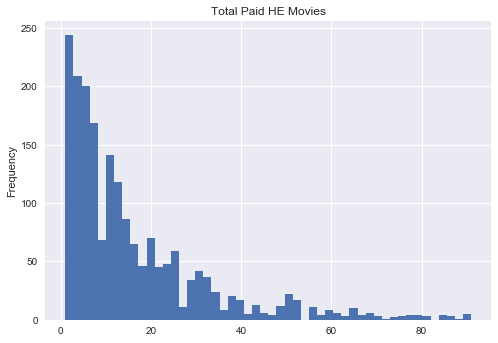

In [7]:
dtt.Total_Paid_HE_Movies.plot(kind='hist', bins = 50, title = 'Total Paid HE Movies')

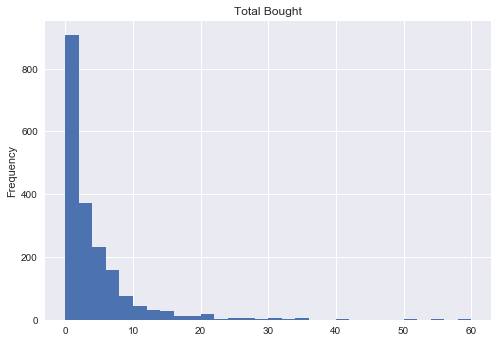

In [8]:
dtt['Total Bought'].plot(kind='hist', bins = 30, title = 'Total Bought')

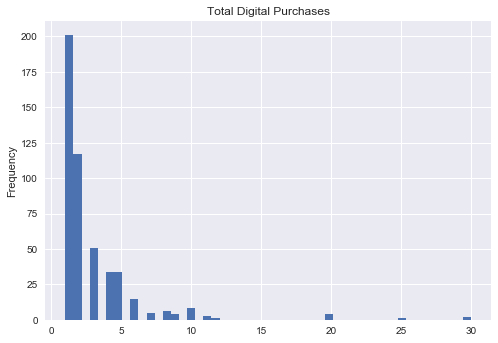

In [9]:
dtt['Bought_Digital'][dtt.Bought_Digital > 0].plot(kind='hist', bins = 50, title = 'Total Digital Purchases')

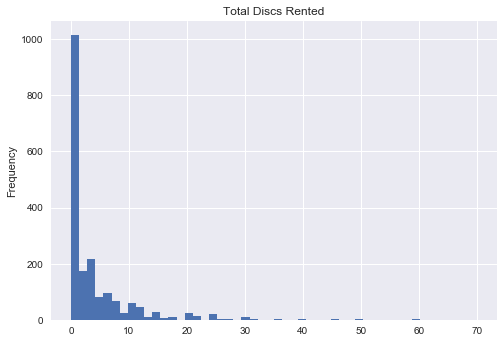

In [10]:
dtt['Total Discs Rented'].plot(kind='hist', bins = 50, title = 'Total Discs Rented')

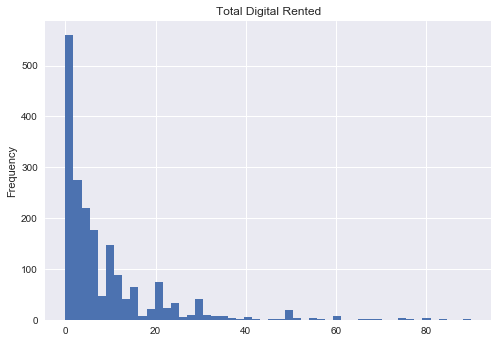

In [11]:
dtt['Total Digital Rented'].plot(kind='hist', bins = 50, title = 'Total Digital Rented')

# Getting Dummies

## Gender

In [12]:
dGender = pd.get_dummies(dtt.Gender, prefix='Gender', drop_first = True)
dGender.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1925 entries, 2 to 19560
Data columns (total 1 columns):
Gender_Male    1925 non-null uint8
dtypes: uint8(1)
memory usage: 96.9 KB


## Age_Breaks

In [13]:
dAge_Breaks = pd.get_dummies(dtt.Age_Breaks, prefix = 'Age', drop_first= True)
dAge_Breaks.info(0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1925 entries, 2 to 19560
Data columns (total 6 columns):
Age_18 to 24    1925 non-null uint8
Age_25 to 34    1925 non-null uint8
Age_35 to 44    1925 non-null uint8
Age_45 to 54    1925 non-null uint8
Age_55 to 64    1925 non-null uint8
Age_65 to 74    1925 non-null uint8
dtypes: uint8(6)
memory usage: 106.3 KB


## Race

In [14]:
dRace = pd.get_dummies(dtt.Race, prefix = 'Race',drop_first=True)
dRace.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1925 entries, 2 to 19560
Data columns (total 4 columns):
Race_Black       1925 non-null uint8
Race_Hispanic    1925 non-null uint8
Race_Other       1925 non-null uint8
Race_White       1925 non-null uint8
dtypes: uint8(4)
memory usage: 102.6 KB


## Region

In [15]:
dRegion = pd.get_dummies(dtt.Region2,prefix='Region', drop_first=True)
dRegion.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1925 entries, 2 to 19560
Data columns (total 3 columns):
Region_Northeast    1925 non-null uint8
Region_South        1925 non-null uint8
Region_West         1925 non-null uint8
dtypes: uint8(3)
memory usage: 100.7 KB


## Parent

In [16]:
dParent = pd.get_dummies(dtt.Parent,prefix='Parent',drop_first=True)
dParent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1925 entries, 2 to 19560
Data columns (total 1 columns):
Parent_Yes    1925 non-null uint8
dtypes: uint8(1)
memory usage: 96.9 KB


## Income

In [17]:
dHH_Income = pd.get_dummies(dtt.HH_Income,prefix='Income',drop_first=True)
dHH_Income.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1925 entries, 2 to 19560
Data columns (total 9 columns):
Income_2 - $20 to $29K         1925 non-null uint8
Income_3 - $30 to $39K         1925 non-null uint8
Income_4 - $40 to $59K         1925 non-null uint8
Income_5 - $60 to $74K         1925 non-null uint8
Income_6 - $75 to $99K         1925 non-null uint8
Income_7 - $100 to $149K       1925 non-null uint8
Income_8 - $150 to $199K       1925 non-null uint8
Income_9 - $200K+              1925 non-null uint8
Income_Prefer not to answer    1925 non-null uint8
dtypes: uint8(9)
memory usage: 112.0 KB


## Employment

In [18]:
dEmployment = pd.get_dummies(dtt.Employment,prefix='Employment', drop_first=True)
dEmployment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1925 entries, 2 to 19560
Data columns (total 3 columns):
Employment_2 - Part time       1925 non-null uint8
Employment_3 - Retired         1925 non-null uint8
Employment_4 - Not employed    1925 non-null uint8
dtypes: uint8(3)
memory usage: 100.7 KB


## Education

In [19]:
dEducation = pd.get_dummies(dtt.Education,prefix='Education', drop_first=True)
dEducation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1925 entries, 2 to 19560
Data columns (total 6 columns):
Education_2 - HS Grad                 1925 non-null uint8
Education_3 - Some coll               1925 non-null uint8
Education_4 - Coll Grad               1925 non-null uint8
Education_5 - Some Post-grad          1925 non-null uint8
Education_6 - Post-grad               1925 non-null uint8
Education_7 - Prefer not to answer    1925 non-null uint8
dtypes: uint8(6)
memory usage: 106.3 KB


## Marital Status

In [20]:
dMarital_Status = pd.get_dummies(dtt.Marital_Status,prefix='Marital_Status', drop_first=True)
dMarital_Status.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1925 entries, 2 to 19560
Data columns (total 3 columns):
Marital_Status_Married                 1925 non-null uint8
Marital_Status_Prefer not to answer    1925 non-null uint8
Marital_Status_Single                  1925 non-null uint8
dtypes: uint8(3)
memory usage: 100.7 KB


## GenderAge

In [21]:
dGenderAge = pd.get_dummies(dtt.GenderAge,prefix='GenderAge', drop_first=True)
dGenderAge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1925 entries, 2 to 19560
Data columns (total 13 columns):
GenderAge_Female 18 to 24    1925 non-null uint8
GenderAge_Female 25 to 34    1925 non-null uint8
GenderAge_Female 35 to 44    1925 non-null uint8
GenderAge_Female 45 to 54    1925 non-null uint8
GenderAge_Female 55 to 64    1925 non-null uint8
GenderAge_Female 65 to 74    1925 non-null uint8
GenderAge_Male 12 to 17      1925 non-null uint8
GenderAge_Male 18 to 24      1925 non-null uint8
GenderAge_Male 25 to 34      1925 non-null uint8
GenderAge_Male 35 to 44      1925 non-null uint8
GenderAge_Male 45 to 54      1925 non-null uint8
GenderAge_Male 55 to 64      1925 non-null uint8
GenderAge_Male 65 to 74      1925 non-null uint8
dtypes: uint8(13)
memory usage: 119.5 KB


In [22]:
dummies = pd.concat([dGender, dAge_Breaks, dRace, dRegion, dGenderAge, 
                dMarital_Status, dEducation, dHH_Income, dParent, dEmployment],axis=1)

dtt = pd.concat([dtt, dummies],axis=1)

dtt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1925 entries, 2 to 19560
Data columns (total 84 columns):
Gender                                 1925 non-null object
Age                                    1925 non-null int64
Region                                 1925 non-null object
Region2                                1925 non-null object
Race                                   1925 non-null object
Language_Dominance                     1925 non-null object
Parent                                 1925 non-null object
HH_Income                              1925 non-null object
Employment                             1925 non-null object
Education                              1925 non-null object
Marital_Status                         1925 non-null object
Total_Paid_HE_Movies                   1925 non-null int64
Bought_Disc_DVD                        1925 non-null int64
Bought_Disc_BD                         1925 non-null int64
Bought_Digital                         1925 non-null int

## Model Building

In [23]:
from sklearn import feature_selection, linear_model

In [24]:
def get_linear_model_metrics(X, y, algo):
    # get the pvalue of X given y. Ignore f-stat for now.
    pvals = feature_selection.f_regression(X, y)[1]
    # start with an empty linear regression object
    # .fit() runs the linear regression function on X and y
    algo.fit(X,y)
    residuals = (y-algo.predict(X)).values

    # print the necessary values
    print 'P Values:', pvals
    print 'Coefficients:', algo.coef_
    print 'y-intercept:', algo.intercept_
    print 'R-Squared:', algo.score(X,y)
    plt.figure()
    plt.hist(residuals, bins=np.ceil(np.sqrt(len(y))).astype(int))
    # keep the model
    return algo


### Creating Feature Sets

In [25]:
XGender = dtt[['Gender_Male']]

XAge_Breaks = dtt[['Age_18 to 24', 'Age_25 to 34', 'Age_35 to 44', 'Age_45 to 54', 'Age_55 to 64', 'Age_65 to 74']]

XAge = dtt[['Age']]

XGenderAge = dtt[['GenderAge_Female 18 to 24', 'GenderAge_Female 25 to 34', 'GenderAge_Female 35 to 44',
                  'GenderAge_Female 45 to 54', 'GenderAge_Female 55 to 64', 'GenderAge_Female 65 to 74', 
                  'GenderAge_Male 12 to 17', 'GenderAge_Male 18 to 24', 'GenderAge_Male 25 to 34', 
                  'GenderAge_Male 35 to 44', 'GenderAge_Male 45 to 54', 'GenderAge_Male 55 to 64', 
                  'GenderAge_Male 65 to 74']]
    
    
    
XRace = dtt[['Race_Black','Race_Hispanic','Race_Other','Race_White']]

XParent = dtt[['Parent_Yes']]

XRegion = dtt[['Region_Northeast', 'Region_South', 'Region_West']]


XIncome = dtt[['Income_2 - $20 to $29K', 'Income_3 - $30 to $39K',
               'Income_4 - $40 to $59K', 'Income_5 - $60 to $74K', 
               'Income_6 - $75 to $99K', 'Income_7 - $100 to $149K', 
               'Income_8 - $150 to $199K', 'Income_9 - $200K+', 'Income_Prefer not to answer']]

XEmpl = dtt[['Employment_2 - Part time', 
             'Employment_3 - Retired', 'Employment_4 - Not employed']]


XEdu = dtt[['Education_2 - HS Grad', 'Education_3 - Some coll', 
            'Education_4 - Coll Grad', 'Education_5 - Some Post-grad', 'Education_6 - Post-grad', 
            'Education_7 - Prefer not to answer']]


XMar = dtt[['Marital_Status_Married', 'Marital_Status_Single']]

XPercent = dtt[['Buy_percent', 'Rent_Disc_Percent', 'Rent_Digital_Percent']]

XMethod = dtt[['Total Bought', 'Total Discs Rented', 'Total Digital Rented']]

XAll = pd.concat([XGender, XAge_Breaks, XRace, XRegion, XParent],axis=1)

In [26]:
Buy_percent = dtt[['Buy_percent']]

Rent_Disc_Percent = dtt[['Rent_Disc_Percent']]

Rent_Digital_Percent = dtt[['Rent_Digital_Percent']]

## The  Model

P Values: [  2.99300779e-01   2.16749544e-01   1.41698889e-01   2.80913513e-01
   9.60156335e-04   1.32946165e-03   9.36924572e-01   8.26199328e-03
   4.14593308e-06   2.16536361e-04   2.80761710e-01   2.29806649e-01
   9.04890211e-02   2.98095961e-15   5.88569078e-08   1.11915493e-10
   2.75169711e-01   2.01694013e-03   3.42073268e-04   5.23092916e-01
   6.59295549e-05   6.77632197e-01   1.34826775e-03   5.81241253e-02
   4.65098188e-02]
Coefficients: [-0.02655745 -1.25706687 -0.71330881 -3.3662142  -5.23529094 -7.2972026
  0.20194269 -4.7376272   2.77241702  1.14016225 -3.8850579  -3.73591502
 -5.97432876 -7.38935123  1.95066473  2.76417506 -2.21953662 -0.94095542
 -4.18953755  3.7681255   4.4343036   4.48863452  0.85782708  0.77072802
  0.27847256]
y-intercept: 17.277309613
R-Squared: 0.0923150263145


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

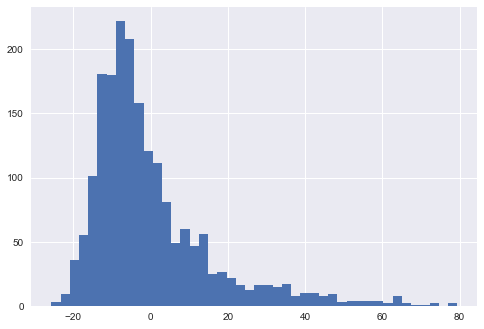

In [27]:
X = pd.concat([XGenderAge, Buy_percent, XParent, Rent_Digital_Percent, XEmpl, XRace, XMar], axis=1)

model = linear_model.LinearRegression()

get_linear_model_metrics(X,dtt['Total_Paid_HE_Movies'],model)

# Key Measures by Demographics

In [28]:
Cons_Meas_wTot = ['Total_Paid_HE_Movies','Total Bought','Total Discs Rented',
                  'Total Digital Rented']

Cons_Meas_noTot = ['Total Bought','Total Discs Rented','Total Digital Rented']

### Consumption by Gender

In [29]:
dtt.groupby(dtt.Gender)[Cons_Meas_wTot].mean()

,Total_Paid_HE_Movies,Total Bought,Total Discs Rented,Total Digital Rented
Gender,,,,
Female,15.535457,3.151079,3.685509,8.698869
Male,16.768908,4.050420,4.014706,8.703782


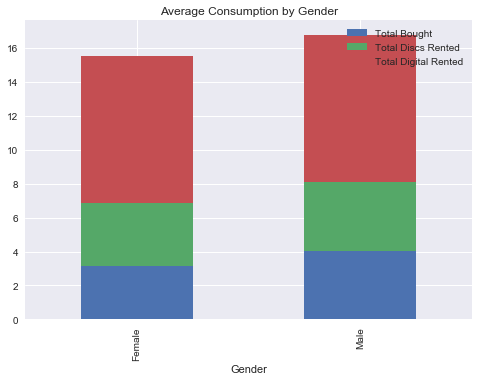

In [30]:
gby_gender = dtt.groupby(dtt.Gender)[Cons_Meas_noTot].mean()
gby_gender.plot(kind='bar',stacked=True,title = "Average Consumption by Gender")

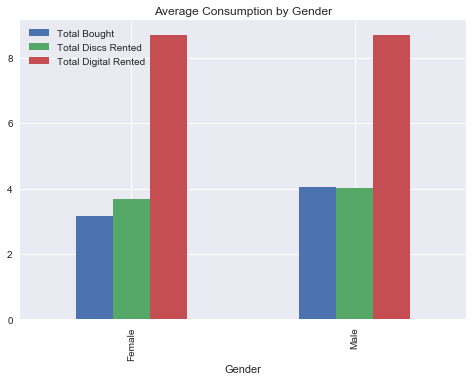

In [31]:
gby_gender = dtt.groupby(dtt.Gender)[Cons_Meas_noTot].mean()
gby_gender.plot(kind='bar',stacked=False,title = "Average Consumption by Gender")

### Consumption by Age Breaks

In [32]:
dtt.groupby(dtt.Age_Breaks)[Cons_Meas_wTot].mean()

,Total_Paid_HE_Movies,Total Bought,Total Discs Rented,Total Digital Rented
Age_Breaks,,,,
12 to 17,16.028736,3.321839,4.017241,8.689655
18 to 24,15.015385,3.553846,2.888462,8.573077
25 to 34,19.552198,4.961538,4.129121,10.461538
35 to 44,19.269231,4.272189,4.656805,10.340237
45 to 54,14.893733,3.313351,3.476839,8.103542
55 to 64,13.156250,2.736111,3.770833,6.649306
65 to 74,11.208955,1.238806,3.873134,6.097015


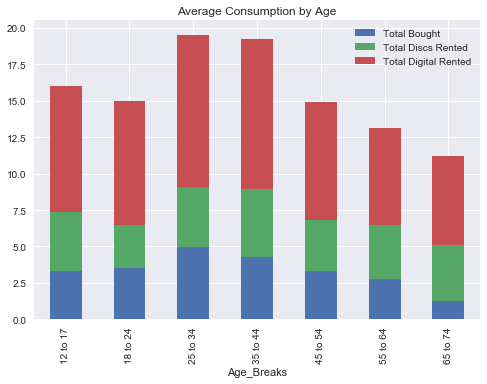

In [33]:
gby_age = dtt.groupby(dtt.Age_Breaks)[Cons_Meas_noTot].mean()
gby_age.plot(kind = 'bar', stacked = True, title = 'Average Consumption by Age')

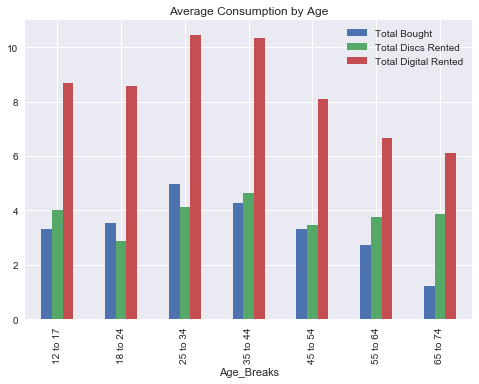

In [34]:
gby_age = dtt.groupby(dtt.Age_Breaks)[Cons_Meas_noTot].mean()
gby_age.plot(kind = 'bar', stacked = False, title = 'Average Consumption by Age')

### Consumption by Race

In [35]:
dtt.groupby(dtt.Race)[Cons_Meas_wTot].mean()

,Total_Paid_HE_Movies,Total Bought,Total Discs Rented,Total Digital Rented
Race,,,,
Asian,14.287356,3.517241,3.517241,7.252874
Black,16.890110,4.236264,3.186813,9.467033
Hispanic,19.531646,4.420886,5.367089,9.743671
Other,17.125000,3.562500,4.291667,9.270833
White,15.301084,3.310372,3.575851,8.414861


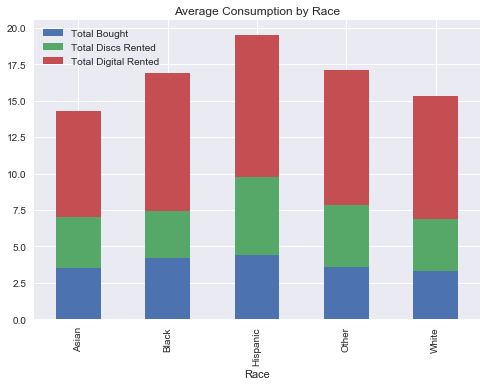

In [36]:
gby_race = dtt.groupby(dtt.Race)[Cons_Meas_noTot].mean()
gby_race.plot(kind = 'bar', stacked = True, title = 'Average Consumption by Race')

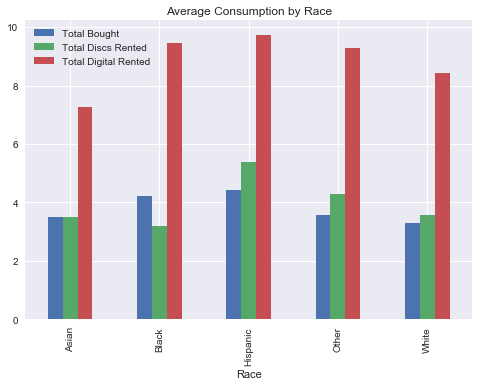

In [37]:
gby_race = dtt.groupby(dtt.Race)[Cons_Meas_noTot].mean()
gby_race.plot(kind = 'bar', stacked = False, title = 'Average Consumption by Race')

### Consumption by Employment Status

In [38]:
dtt.groupby(dtt.Employment)[Cons_Meas_wTot].mean()

,Total_Paid_HE_Movies,Total Bought,Total Discs Rented,Total Digital Rented
Employment,,,,
1 - Full time,18.290389,4.309816,4.423313,9.557260
2 - Part time,15.083665,3.446215,3.326693,8.310757
3 - Retired,12.918552,1.909502,3.909502,7.099548
4 - Not employed,13.791579,2.989474,2.911579,7.890526


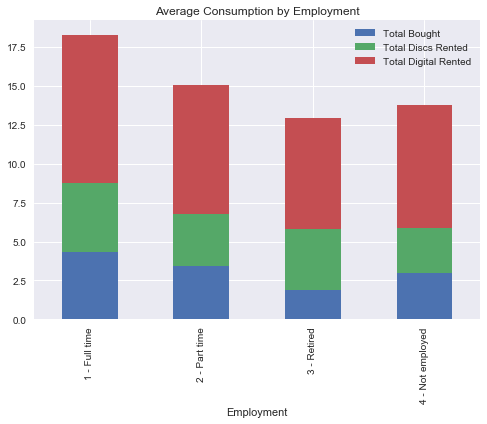

In [39]:
gby_emply = dtt.groupby(dtt.Employment)[Cons_Meas_noTot].mean()
gby_emply.plot(kind = 'bar', stacked = True, title = 'Average Consumption by Employment')

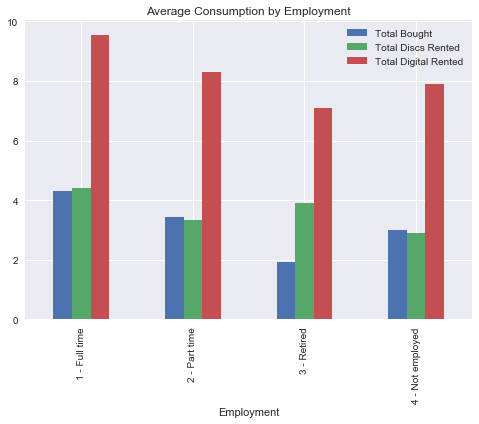

In [40]:
gby_emply = dtt.groupby(dtt.Employment)[Cons_Meas_noTot].mean()
gby_emply.plot(kind = 'bar', stacked = False, title = 'Average Consumption by Employment')

### Consumption by Education

In [41]:
dtt.groupby(dtt.Education)[Cons_Meas_wTot].mean()

,Total_Paid_HE_Movies,Total Bought,Total Discs Rented,Total Digital Rented
Education,,,,
1 - HS or less,13.870229,2.854962,2.923664,8.091603
2 - HS Grad,15.467857,3.796429,3.089286,8.582143
3 - Some coll,15.831325,2.975904,3.891566,8.963855
4 - Coll Grad,17.709677,4.480475,4.193548,9.035654
5 - Some Post-grad,17.278689,2.377049,4.950820,9.950820
6 - Post-grad,15.200000,3.451852,4.029630,7.718519
7 - Prefer not to answer,11.153846,3.076923,3.000000,5.076923


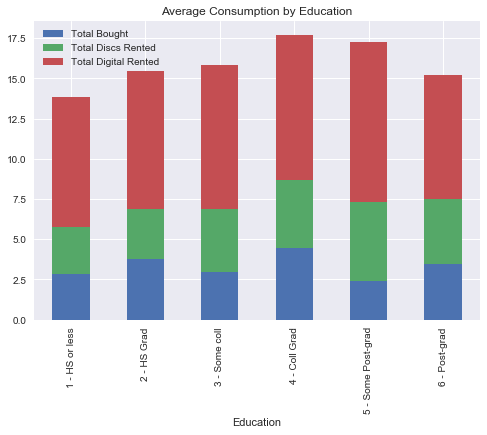

In [42]:
gby_educ = dtt.groupby(dtt.Education)[Cons_Meas_noTot].mean()
gby_educ = gby_educ.drop(['7 - Prefer not to answer'])

gby_educ.plot(kind = 'bar', stacked = True, title = 'Average Consumption by Education')

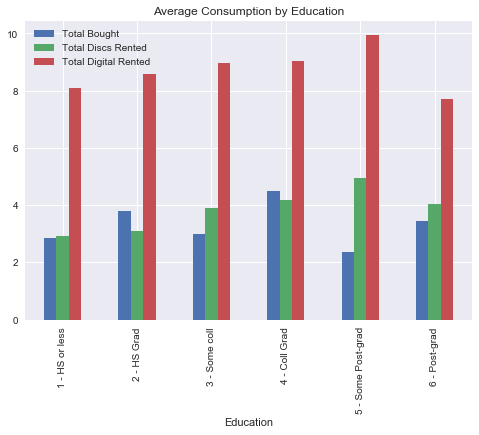

In [43]:
gby_educ = dtt.groupby(dtt.Education)[Cons_Meas_noTot].mean()
gby_educ = gby_educ.drop(['7 - Prefer not to answer'])
gby_educ.plot(kind = 'bar', stacked = False, title = 'Average Consumption by Education')

### Consumption by Marital Status

In [44]:
dtt.groupby(dtt.Marital_Status[dtt.Marital_Status != 'Prefer not to answer'])[Cons_Meas_wTot].mean()

,Total_Paid_HE_Movies,Total Bought,Total Discs Rented,Total Digital Rented
Marital_Status,,,,
Living with a partner,17.082192,3.616438,3.458904,10.006849
Married,16.836858,3.832830,4.327291,8.676737
Single,15.219160,3.320210,3.321522,8.577428


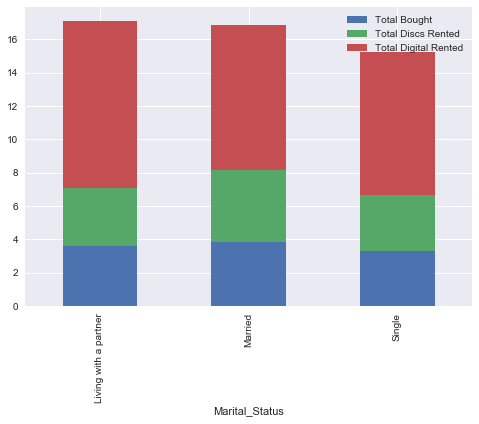

In [45]:
dtt.groupby(
    dtt.Marital_Status[dtt.Marital_Status != 'Prefer not to answer'])[Cons_Meas_noTot].mean().plot(kind='bar',
                                                                                                   stacked = True)

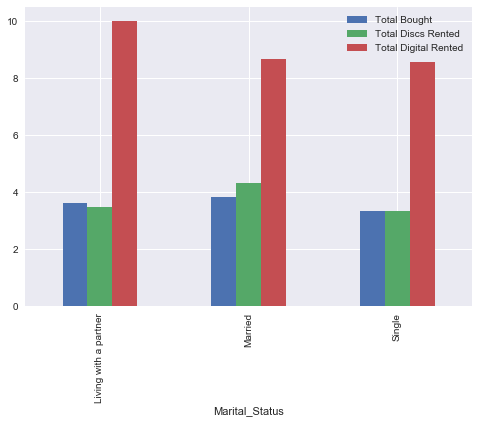

In [46]:
dtt.groupby(
    dtt.Marital_Status[dtt.Marital_Status != 'Prefer not to answer'])[Cons_Meas_noTot].mean().plot(kind='bar',
                                                                                                   stacked = False)

### Consumption by Parental status

In [47]:
dtt.groupby(dtt.Parent [(dtt.Parent == "Yes") | (dtt.Parent == "No")])[Cons_Meas_wTot].mean()

,Total_Paid_HE_Movies,Total Bought,Total Discs Rented,Total Digital Rented
Parent,,,,
No,14.573798,2.967662,3.332504,8.273632
Yes,18.781641,4.649513,4.713491,9.418637


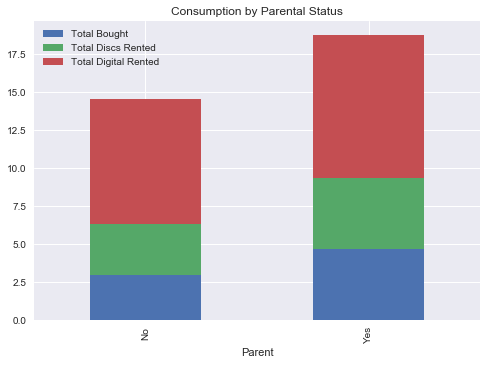

In [48]:
dtt.groupby(
    dtt.Parent[(dtt.Parent == 'Yes')|(dtt.Parent == 'No')])[Cons_Meas_noTot].mean().plot(kind='bar',
                                                                                         title = 'Consumption by Parental Status', 
                                                                                         stacked = True)

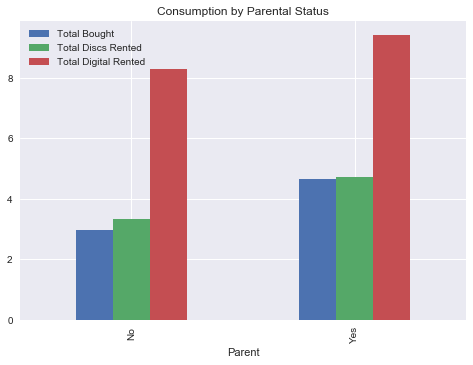

In [49]:
dtt.groupby(
    dtt.Parent[(dtt.Parent == 'Yes')|(dtt.Parent == 'No')])[Cons_Meas_noTot].mean().plot(kind='bar',
                                                                                         title = 'Consumption by Parental Status', 
                                                                                         stacked = False)